In [ ]:
######################################### Load Libraries and Modules #########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split # splits arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, f1_score, classification_report # the sklearn.metrics module includes performance metrics
from sklearn.linear_model import LogisticRegression        # the sklearn.linear_model module implements generalized linear models. LogReg is part of this module

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [ ]:
# Identify the data size
df.shape

(569, 32)

In [ ]:
# See what's in the dataframe
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# Describe the data for central tendency and other statistical descriptions
# for display/output format purpose we turn the descriptions result into a dataframe so that we can see the results for each column
summary_stats = pd.DataFrame(df.describe())
print(summary_stats[summary_stats.columns[:15]])
print(summary_stats[summary_stats.columns[15:]])

                 0           2           3           4            5   \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               6           7           8           9           10          11  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  569.000000   
mean     0.096360    0.104341    0.088799    0.048919    0.181162    0.062798   
std      0.014064    0.052813    0.079720    0.038803    0.027414    0.007060   
min      0.052630    0.0193

In [ ]:
# Reveal the missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [ ]:
print(df[1].unique())

['M' 'B']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Encode the labels
le.fit(['B','M'])
# Show the label classes
print(le.classes_)
# Transform the label of the table
df[1] = le.transform(df[1])

df.head(5)

['B' 'M']


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


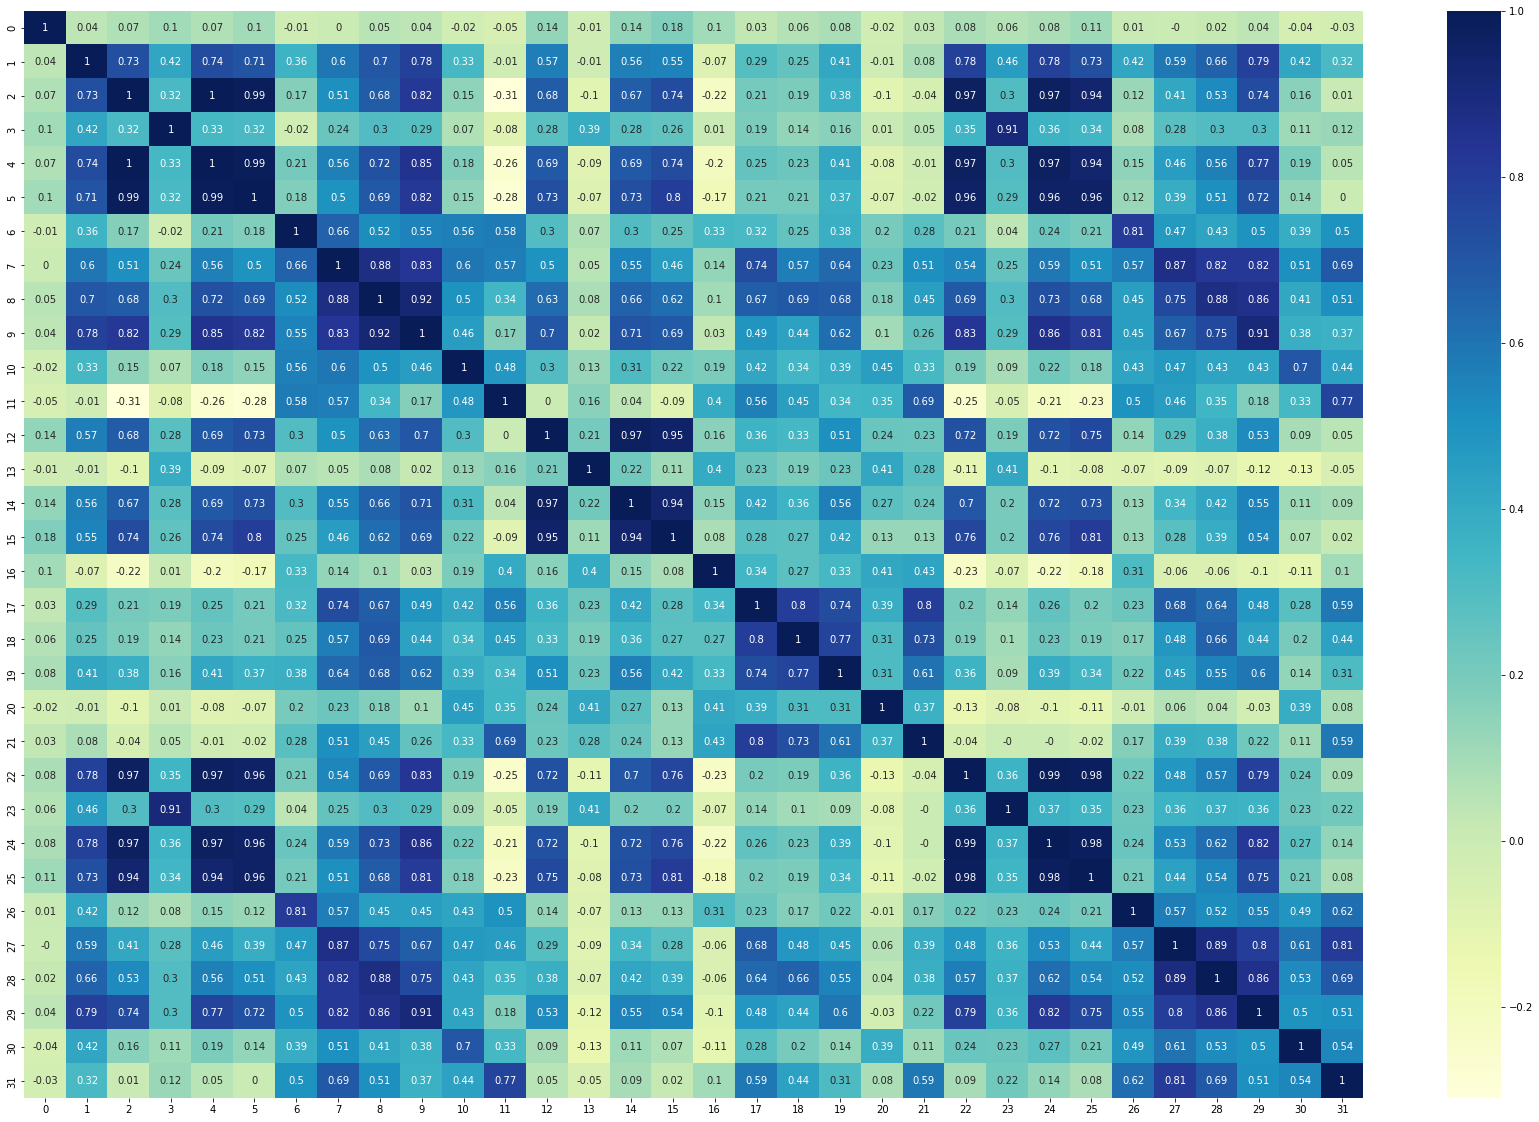

In [ ]:
# Correlation Matrix
plt.figure(figsize = (30,20))

p1 = round(df.corr(), 2)

sns.heatmap(p1,cmap="YlGnBu", annot=True)

## 2. K-NN Model Building

In [ ]:
# Prepare the data by defining the label and explanatory variable. 
y = df[1]                               # Column one 0: Benign, and 1: Malignant
X = df.loc[:, df.columns != 1]          # Select all columns except column 1

In [ ]:
############################################# Train the Model #############################################

from sklearn import neighbors
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def train_knn(X_train, y_train):
    # KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
    # Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

    # Set parameters of KNeighborsClassifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, # n_neighbors is the k in the kNN
                            p=2,                     # power parameter for the Minkowski metric. We used p = 2, 
                            metric='minkowski',      # the default metric is minkowski, which is a generalization of the Euclidean distance
                                                        # with p=2 is equivalent to the standard Euclidean distance.
                                                        # with p=1 is equivalent to the Mahattan distance.
                            n_jobs=-1,               # the number of parallel jobs to run for neighbors search. -1 means using all processors
                            weights='distance')       # We choose 'distance' because we wanted to apply a similarity-moderated kNN
    # Train the model      
    knn = knn.fit(X_train, y_train) 
    return knn 

def plot_confusion_matrix(test_labels, pred_labels, normalize = False, title = 'Confusion Matrix'):
    """Plot confusion matrix
        Arguments:
            ground truth labels and predicted labels
        Returns:
            Writes image file of confusion matrix
    """
    y_test = test_labels
    y_pred = pred_labels
    labs = [0, 1]
    cm = confusion_matrix(y_test,y_pred, labels=labs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labs)
    disp.plot(include_values=True) 
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [ ]:
# Split the data into the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Accuracy (out-of-sample): 0.77
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.7416993464052287
F1 score (in-sample)    :  1.0
              precision    recall  f1-score   support

           B       0.80      0.86      0.83       148
           M       0.70      0.61      0.65        80

    accuracy                           0.77       228
   macro avg       0.75      0.74      0.74       228
weighted avg       0.77      0.77      0.77       228



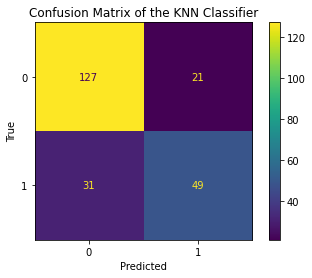

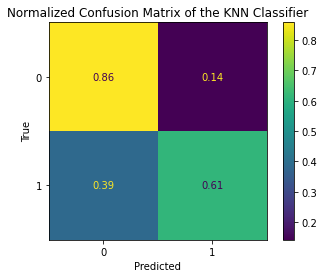

In [ ]:
############################################# Evaluate the Model #############################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

knn = train_knn(X_train, y_train)
# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test)            # make predictions for test set
y_pred_insample = knn.predict(X_train)  # make predictions for train set (for educational purposes, to demonstrate the difference)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['B','M']))             # builds a text report showing the main classification metrics (precision, recall, f1-score)

# Print non normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred),
                        title = 'Confusion Matrix of the KNN Classifier')

# Print normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred), 
                        normalize=True,
                        title = 'Normalized Confusion Matrix of the KNN Classifier')

#### KNN for normalized dataset

In [ ]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.40, random_state=42)

Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.9570342762620658
F1 score (in-sample)    :  1.0
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       148
           M       0.93      0.96      0.94        80

    accuracy                           0.96       228
   macro avg       0.95      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



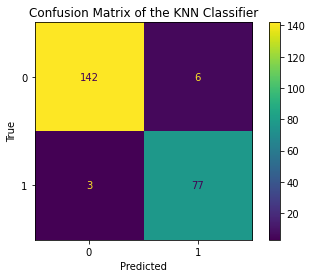

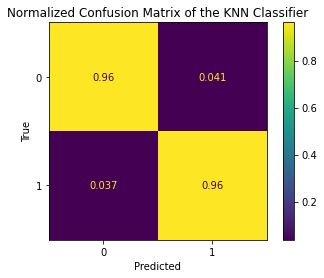

In [ ]:
############################################# Evaluate the kNN Model for scaled data #############################################
knn = train_knn(X_train, y_train)
# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test)            # make predictions for test set
y_pred_insample = knn.predict(X_train)  # make predictions for train set (for educational purposes, to demonstrate the difference)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['B','M']))             # builds a text report showing the main classification metrics (precision, recall, f1-score)

# Print non normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred),
                        title = 'Confusion Matrix of the KNN Classifier')

# Print normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred), 
                        normalize=True,
                        title = 'Normalized Confusion Matrix of the KNN Classifier')

## 3. Logistic Regression

In [ ]:
# Split the non scaled dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

The weights of the attributes are: [[ 4.50012133e-09 -6.05608356e-01  9.94040853e-02 -9.24863274e-02
  -1.79683456e-03 -4.99625392e+01 -1.44771575e+02  6.34353735e+00
   3.73271714e+02 -7.50807714e+01 -1.66832696e+00  2.39413286e+01
  -1.64451383e+00 -2.07613276e+00  1.85559326e-01 -1.95417798e+02
   7.57587751e+01 -1.33020794e+02  5.41728129e+02 -3.11295954e+02
  -4.12867053e+02 -2.03008077e-01  5.40104235e-01 -5.89954041e-02
   1.03865595e-02 -1.12780065e+01 -1.82353888e+01  4.22661286e+01
   5.74779802e+00  8.43240304e+01 -9.51625883e+00]]
The weights of the intercepts are: [-14.3643838]
The predictions are: 0 [0.95580592 0.04419408] 1.0
Accuracy (out-of-sample): 0.95
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.947766323024055
F1 score (in-sample)    :  1.0
              precision    recall  f1-score   support

           B       0.98      0.95      0.96       148
           M       0.91      0.96      0.93        80

    accuracy                           0.95       228

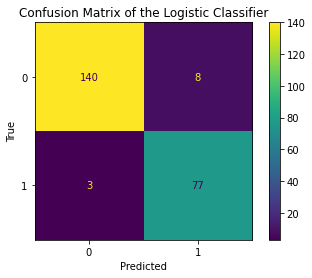

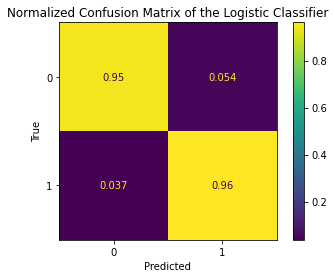

In [ ]:
#################################### Train the Logistic Regression Model ####################################

# We first create an instance of the Classifier
# We will use a Logistic Regression (aka logit) classifier

from sklearn import linear_model

# sklrean documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = linear_model.LogisticRegression(multi_class='auto', # accomondates multi-class categorical target variable
                                      penalty='l1', # We used l1 penality for feature selection purpose since some features are calculated from others.
                                      C=1e15, # C parameter is the inverse of regularization strength (i.e., smaller C values 
                                             # specify stronger regularization)
                                             # C must be a positive float
                                             # C in this case is 1/lambda
                                             # Applies regularization by default; you can set C very large to avoid regularization 
                                             # (setting penalty l2 can speed up the estimations with a very large C)
                                      solver = 'liblinear',   # We used liblinear algorithm in the optimization problem.
                                                              # liblinear solver is recommended by sklearn documentation for small dataset.
                                      max_iter=100)       # we used the default number of max iterations taken for the solvers to converge.
 

# Train the model (fit the data)
# As with other classifiers, it takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clf = clf.fit(X_train, y_train)                             # model induction using the train data
print('The weights of the attributes are:', clf.coef_)      # reports coefficients of the features in the decision function
print('The weights of the intercepts are:', clf.intercept_) # reports intercepts in the decision function

#################################### Apply the Logistic Regression Model ####################################

# We now apply the logistic regression model to the test set
y_pred = clf.predict(X_test)             # generate classification prediction
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities
print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays

################################### Evaluate the Logistic Regression Model ##################################

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['B', 'M'])) # builds a text report showing the main classification metrics (precision, recall, f1-score)

# Print non normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred),
                        title = 'Confusion Matrix of the Logistic Classifier')

# Print normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred), 
                        normalize=True,
                        title = 'Normalized Confusion Matrix of the Logistic Classifier')

### Logistic Regression for scaled/normalized data

In [ ]:
# Split the scaled dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.40, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


The weights of the attributes are: [[   3.96947731  -65.79017769   44.28145705  -61.40906492  109.90793
   -53.8434882  -282.5436425   129.2788061   284.33985389 -105.10280915
   145.20050658  569.94000275  -17.09631305 -252.6640345   161.42005013
    41.00596349  101.07021158 -206.97140419   22.90482459 -140.49460821
  -180.01860035   -7.47998166   57.17147417 -115.80068838  125.83312439
   -67.33817045  -99.34290151  165.39332047  118.96305425  296.71972309
   -85.88332302]]
The weights of the intercepts are: [-101.07158394]
The predictions are: 0 [9.99999268e-01 7.32230390e-07] 1.0
Accuracy (out-of-sample): 0.94
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.9382692908466104
F1 score (in-sample)    :  1.0
              precision    recall  f1-score   support

           B       0.97      0.94      0.96       148
           M       0.89      0.95      0.92        80

    accuracy                           0.94       228
   macro avg       0.93      0.94      0.94       228
w

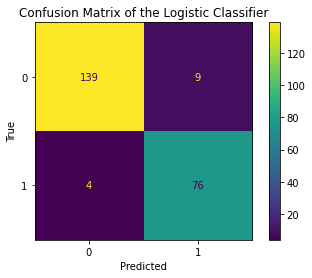

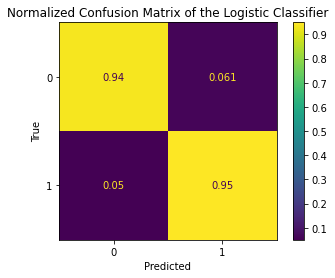

In [ ]:
# sklrean documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = linear_model.LogisticRegression(multi_class='auto', # accomondates multi-class categorical target variable
                                      penalty='l1',
                                      C=1e15, # C parameter is the inverse of regularization strength (i.e., smaller C values 
                                             # specify stronger regularization)
                                             # C must be a positive float
                                             # C in this case is 1/lambda
                                             # Applies regularization by default; you can set C very large to avoid regularization 
                                             # (setting penalty l2 can speed up the estimations with a very large C)
                                      solver = 'liblinear',   # solver specifies the algorithm to use in the optimization problem. Default is ‘lbfgs’
                                      max_iter=100)       # maximum number of iterations taken for the solvers to converge. Default is 100
 

# Train the model (fit the data)
# As with other classifiers, it takes as input two arrays: an array X, sparse or dense, 
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], 
# holding the class labels for the training samples:
clf = clf.fit(X_train, y_train)                             # model induction using the train data
print('The weights of the attributes are:', clf.coef_)      # reports coefficients of the features in the decision function
print('The weights of the intercepts are:', clf.intercept_) # reports intercepts in the decision function

#################################### Apply the Logistic Regression Model ####################################

# We now apply the logistic regression model to the test set
y_pred = clf.predict(X_test)             # generate classification prediction
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities
print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays

################################### Evaluate the Logistic Regression Model on scaled ##################################

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['B', 'M'])) # builds a text report showing the main classification metrics (precision, recall, f1-score)

# Print non normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred),
                        title = 'Confusion Matrix of the Logistic Classifier')

# Print normalized confusion matrix
plot_confusion_matrix(list(y_test), 
                        list(y_pred), 
                        normalize=True,
                        title = 'Normalized Confusion Matrix of the Logistic Classifier')